# Recitation: Cross Validation + ROC Curve
Code Authors: Emaad Manzoor, Mallory Nobles

Data Source: Andrew Ng

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load data

In [2]:
#X_file = open("ex8a.csv", "r") #2nd Dataset to Try
X_file = open("ex8b_m.csv", "r") 
X_file = X_file.readlines()
y = []
x1 = []
x2 = []
for l in range(0,len(X_file)):
    l_text = X_file[l].rstrip()
    [l_y, l_x1, l_x2] = l_text.split(",")
    y.append(int(l_y))
    x1.append(float(l_x1))
    x2.append(float(l_x2))
    
y = [0 if b == -1 else b for b in y]
y = np.array(y)
X = np.column_stack((x1,x2))

n_samples, n_features = X.shape

(-0.6513310808243729,
 0.35179208082437285,
 -0.7346359504415011,
 0.6501329504415009)

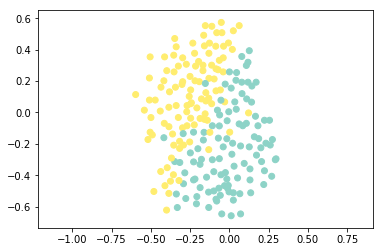

In [3]:
#Plot the Data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set3')
plt.axis('equal')

# Plot different SVM Classifiers 

(Here, we are fitting the classifier on the whole dataset.  You wouldn't normally do this, it is just to demonstrate what the RBF kernel looks like, and show the need for model selection.)

In [4]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - .1, x.max() + .1
    y_min, y_max = y.min() - .1, y.max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

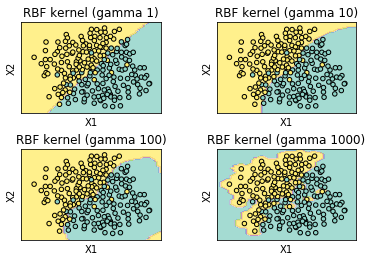

In [5]:
C= 1.0
from sklearn import svm
models = (svm.SVC(kernel='rbf', gamma=1.0, C=C),
          svm.SVC(kernel='rbf', gamma=10.0, C=C),
          svm.SVC(kernel='rbf', gamma=100.0, C=C),
          svm.SVC(kernel='rbf', gamma=1000.0, C=C))
models = (clf.fit(X, y) for clf in models)# title for the plots

titles = ('RBF kernel (gamma 1)',
          'RBF kernel (gamma 10)',
          'RBF kernel (gamma 100)',
          'RBF kernel (gamma 1000)')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap='Set3', alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap='Set3', s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

# Cross Validation

# Hold out test data

Hold out 25% of the data for testing.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

# SVM: Create the hyperparameter grid

In [7]:
Cs = np.logspace(-4, 2, 10) #10 numbers evenly spaced between 10^-4 and 10^(2)
Gammas = [1.0, 10.0, 100.0, 1000.0]
parameter_list = [[C,G] for C in Cs for G in Gammas]

# SVM: 5-fold cross-validation to select $C$ and $\gamma$

In [8]:
from sklearn.model_selection import KFold
from sklearn import svm

n_folds = 5
k_fold = KFold(n_folds)

c_g_scores = []
for p in parameter_list:
    C = p[0]
    G = p[1]
    fold_scores = []
    print("C = " + str(C) + " , Gamma = " + str(G))
    for k, (train, val) in enumerate(k_fold.split(X_train, y_train)):
        clf = svm.SVC(kernel='rbf', gamma=G, C=C)
        clf.fit(X_train[train], y_train[train])
        
        ypred = clf.predict(X_train[val])
        yval = y_train[val]
        accuracy = np.sum(ypred==yval)/len(ypred)
        fold_scores.append(accuracy)
        
        print("\t[fold {0}] C: {1:.5f}, Gamma: {2:.5f}, accuracy: {3:.5f}".
                format(k, C, G, accuracy))
    
    c_g_score = np.mean(fold_scores)
    c_g_scores.append(c_g_score)
    print("\tMean k-Fold score: " + str(c_g_score))

C = 0.0001 , Gamma = 1.0
	[fold 0] C: 0.00010, Gamma: 1.00000, accuracy: 0.50000
	[fold 1] C: 0.00010, Gamma: 1.00000, accuracy: 0.84375
	[fold 2] C: 0.00010, Gamma: 1.00000, accuracy: 0.53125
	[fold 3] C: 0.00010, Gamma: 1.00000, accuracy: 0.35484
	[fold 4] C: 0.00010, Gamma: 1.00000, accuracy: 0.38710
	Mean k-Fold score: 0.5233870967741936
C = 0.0001 , Gamma = 10.0
	[fold 0] C: 0.00010, Gamma: 10.00000, accuracy: 0.50000
	[fold 1] C: 0.00010, Gamma: 10.00000, accuracy: 0.90625
	[fold 2] C: 0.00010, Gamma: 10.00000, accuracy: 0.53125
	[fold 3] C: 0.00010, Gamma: 10.00000, accuracy: 0.35484
	[fold 4] C: 0.00010, Gamma: 10.00000, accuracy: 0.38710
	Mean k-Fold score: 0.5358870967741935
C = 0.0001 , Gamma = 100.0
	[fold 0] C: 0.00010, Gamma: 100.00000, accuracy: 0.50000
	[fold 1] C: 0.00010, Gamma: 100.00000, accuracy: 0.84375
	[fold 2] C: 0.00010, Gamma: 100.00000, accuracy: 0.53125
	[fold 3] C: 0.00010, Gamma: 100.00000, accuracy: 0.35484
	[fold 4] C: 0.00010, Gamma: 100.00000, accurac

	[fold 1] C: 1.00000, Gamma: 100.00000, accuracy: 0.87500
	[fold 2] C: 1.00000, Gamma: 100.00000, accuracy: 0.90625
	[fold 3] C: 1.00000, Gamma: 100.00000, accuracy: 0.90323
	[fold 4] C: 1.00000, Gamma: 100.00000, accuracy: 0.90323
	Mean k-Fold score: 0.8925403225806452
C = 1.0 , Gamma = 1000.0
	[fold 0] C: 1.00000, Gamma: 1000.00000, accuracy: 0.78125
	[fold 1] C: 1.00000, Gamma: 1000.00000, accuracy: 0.78125
	[fold 2] C: 1.00000, Gamma: 1000.00000, accuracy: 0.81250
	[fold 3] C: 1.00000, Gamma: 1000.00000, accuracy: 0.48387
	[fold 4] C: 1.00000, Gamma: 1000.00000, accuracy: 0.67742
	Mean k-Fold score: 0.707258064516129
C = 4.641588833612772 , Gamma = 1.0
	[fold 0] C: 4.64159, Gamma: 1.00000, accuracy: 0.93750
	[fold 1] C: 4.64159, Gamma: 1.00000, accuracy: 0.90625
	[fold 2] C: 4.64159, Gamma: 1.00000, accuracy: 0.87500
	[fold 3] C: 4.64159, Gamma: 1.00000, accuracy: 0.90323
	[fold 4] C: 4.64159, Gamma: 1.00000, accuracy: 0.93548
	Mean k-Fold score: 0.911491935483871
C = 4.64158883361

In [9]:
best_score_idx = np.argmax(c_g_scores)
best_p = parameter_list[best_score_idx]
best_c = best_p[0]
best_g = best_p[1]
print("Best C: " + str(best_p[0]) + " Best G: " + str(best_p[1]) + " with score: " + str(c_g_scores[best_score_idx]))

Best C: 100.0 Best G: 1.0 with score: 0.9237903225806452


# Fit Final Models

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf_svm = svm.SVC(kernel='rbf', gamma=best_g, C=best_c)
clf_svm.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Graph of Learned Decision Boundary + Training Data

Text(0.5,1,'RBF, Best Parameters')

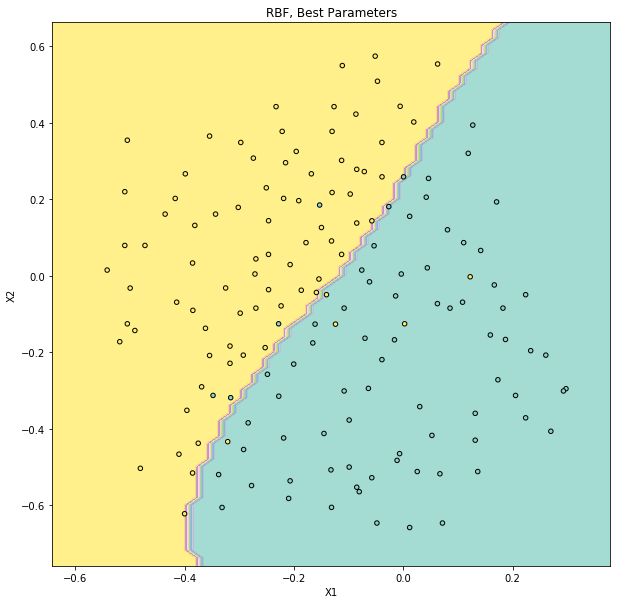

In [11]:
clf_svm = svm.SVC(kernel='rbf', gamma=best_g, C=best_c)
clf_svm.fit(X_train, y_train)

plt.figure(figsize=(10,10))

X0_train, X1_train = X_train[:, 0], X_train[:, 1]
xx_train, yy_train = make_meshgrid(X0_train, X1_train)

plot_contours(plt, clf_svm, xx_train, yy_train,cmap='Set3', alpha=0.8)
plt.scatter(X0_train, X1_train, c=y_train, cmap='Set3', s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("RBF, Best Parameters")

### Graph of Learned Decision Boundary + Test Data

Text(0.5,1,'RBF, Best Parameters')

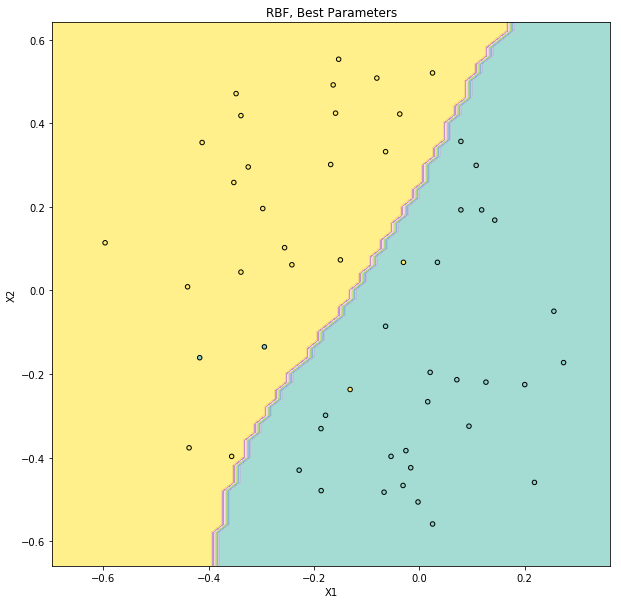

In [12]:
clf_svm = svm.SVC(kernel='rbf', gamma=best_g, C=best_c)
clf_svm.fit(X_train, y_train)

plt.figure(figsize=(10,10))

X0_test, X1_test = X_test[:, 0], X_test[:, 1]
xx_test, yy_test = make_meshgrid(X0_test, X1_test)

plot_contours(plt, clf_svm, xx_test, yy_test,cmap='Set3', alpha=0.8)
plt.scatter(X0_test, X1_test, c=y_test, cmap='Set3', s=20, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("RBF, Best Parameters")

# ROC curve

In [13]:
#Load Data 
from sklearn import datasets
iris = datasets.load_iris()
Xi = iris.data
yi = iris.target
Xi, yi = Xi[yi != 2], yi[yi != 2]
n_samples, n_features = Xi.shape

# Add noisy features
random_state = np.random.RandomState(0)
Xi = np.c_[Xi, random_state.randn(n_samples, 200 * n_features)]

#Hold Out Test Data
from sklearn.model_selection import train_test_split
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.25, shuffle=True)

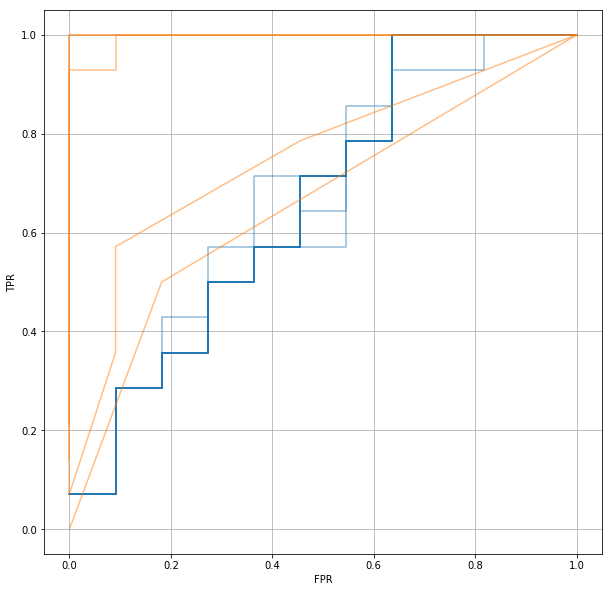

In [14]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,10))

#SVMs
for C in Cs:
    clf_svm = svm.LinearSVC(C=C)
    clf_svm.fit(Xi_train, yi_train)
    y_score = clf_svm.decision_function(Xi_test)
    fpr, tpr, thresholds = roc_curve(yi_test, y_score, pos_label=1)
    auc = np.trapz(tpr, fpr)
    plt.plot(fpr, tpr, linestyle='-', alpha=0.5, color='C0')

# Random Forests
for ntrees in [1, 10, 20, 100, 1000]:
    clf_rf = RandomForestClassifier(n_estimators=ntrees)
    clf_rf.fit(Xi_train, yi_train)
    y_score = clf_rf.predict_proba(Xi_test)[:,1]
    fpr, tpr, thresholds = roc_curve(yi_test, y_score, pos_label=1)
    auc = np.trapz(tpr, fpr)
    plt.plot(fpr, tpr, linestyle='-', alpha=0.5, color='C1')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show() 